# Node2Vec: 《悲惨世界》人物关系图嵌入

> 参考资料：
>
> Elior Cohen 代码：https://github.com/eliorc/node2vec
>
> Elior Cohen 博客：https://maelfabien.github.io/machinelearning/graph_5/


## 1. 环境准备

### 安装工具包

In [1]:
!pip install node2vec networkx numpy matplotlib

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple


### 导入工具包

In [2]:
# 图数据挖掘
import networkx as nx

# 数据分析
import numpy as np

# 随机数
import random

# 数据可视化
import matplotlib.pyplot as plt


## 2. 数据

### 初始化

In [3]:
# 空手道俱乐部
# G = nx.karate_club_graph()

# 悲惨世界 人物
G = nx.les_miserables_graph()

In [4]:
G.nodes

NodeView(('Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

In [5]:
len(G)

77

### 可视化

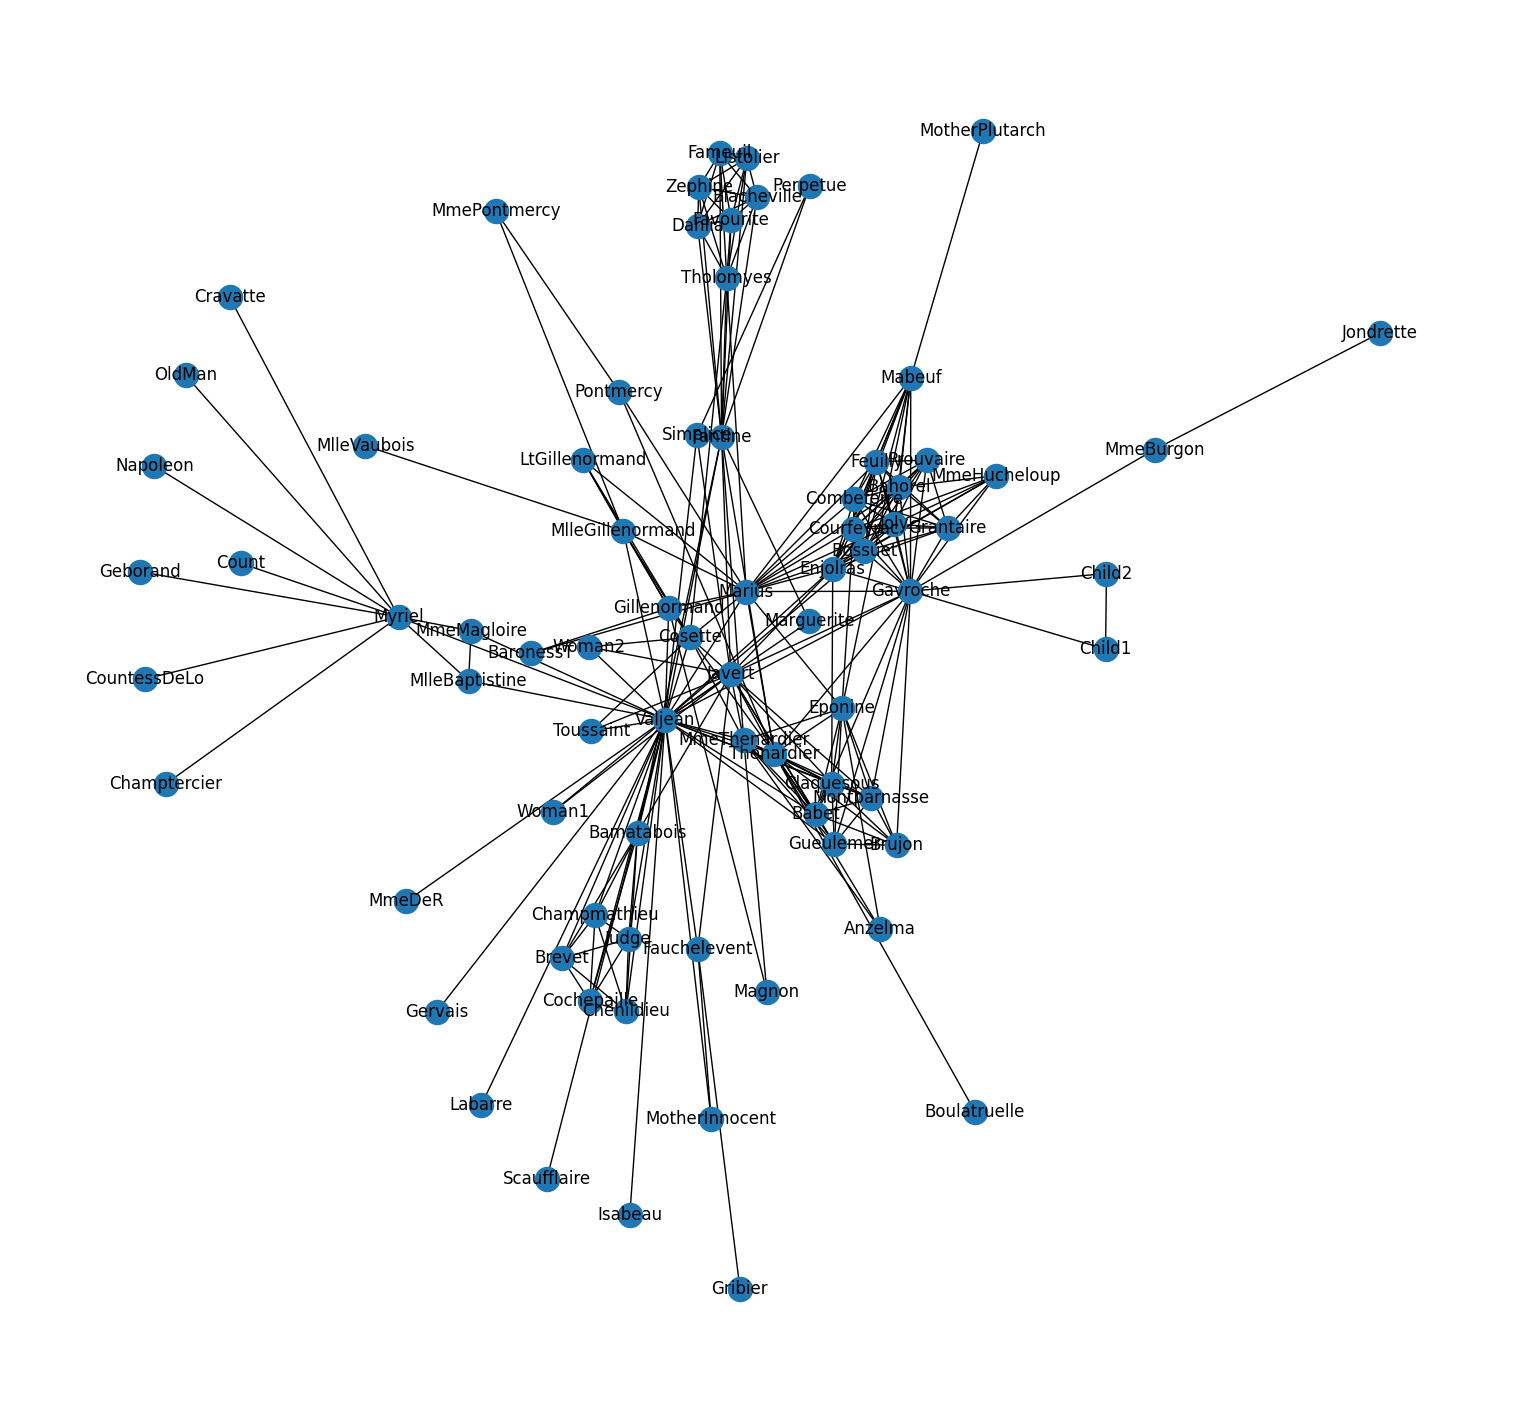

In [6]:
plt.figure(figsize=(15,14))
pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos, with_labels=True)
plt.show()

## 3. 构建 Node2Vec 模型

### Node2Vec 嵌入

In [24]:
from node2vec import Node2Vec

n2v = Node2Vec(G,
               dimensions=32,   # 嵌入维度 
               p=2,             # p参数（回）
               q=0.5,           # q参数（去）
               walk_length=30,  # 随机游走序列长度
               num_walks=600,   # 每个节点作为起始节点的次数
               workers=4        # 并行线程数
              )

# p, q 都是越小，则影响越大
# p=1, q=0.5, n_clusters=6  : DFS深度优先搜索，挖掘同质社群
# p=0.5, q=1, n_clusters=3  : BFS广度优先搜索，挖掘结构特征

# 训练 Node2Vec
model = n2v.fit(window=3,     # Skip-Gram窗口大小
                min_count=1,  # 忽略出现次数低于此阈值的节点
                batch_words=4 # 每个线程处理的数据量
               )

# 取出嵌入结果向量
X = model.wv.vectors

Generating walks (CPU: 3): 100%|██████████| 150/150 [00:00<00:00, 328.33it/s]


In [25]:
X.shape

(77, 32)

### KMeans 聚类可视化

> Kmeans 聚类算法讲解：https://www.bilibili.com/video/BV1HJ411P7cs/

In [26]:
# # DBSCAN 聚类
# from sklearn.cluster import DBSCAN

# cluster_labels = DBSCAN(eps=0.5, min_samples=6).fit(X).labels_
# print(cluster_labels)

# KMeans 聚类
from sklearn.cluster import KMeans
import numpy as np

cluster_labels = KMeans(n_clusters=3).fit(X).labels_
print(cluster_labels)

[2 1 1 1 2 2 1 1 1 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0 2
 1 2 0 0 0 0 2 1 2 1 1 1 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2
 2 2 2]


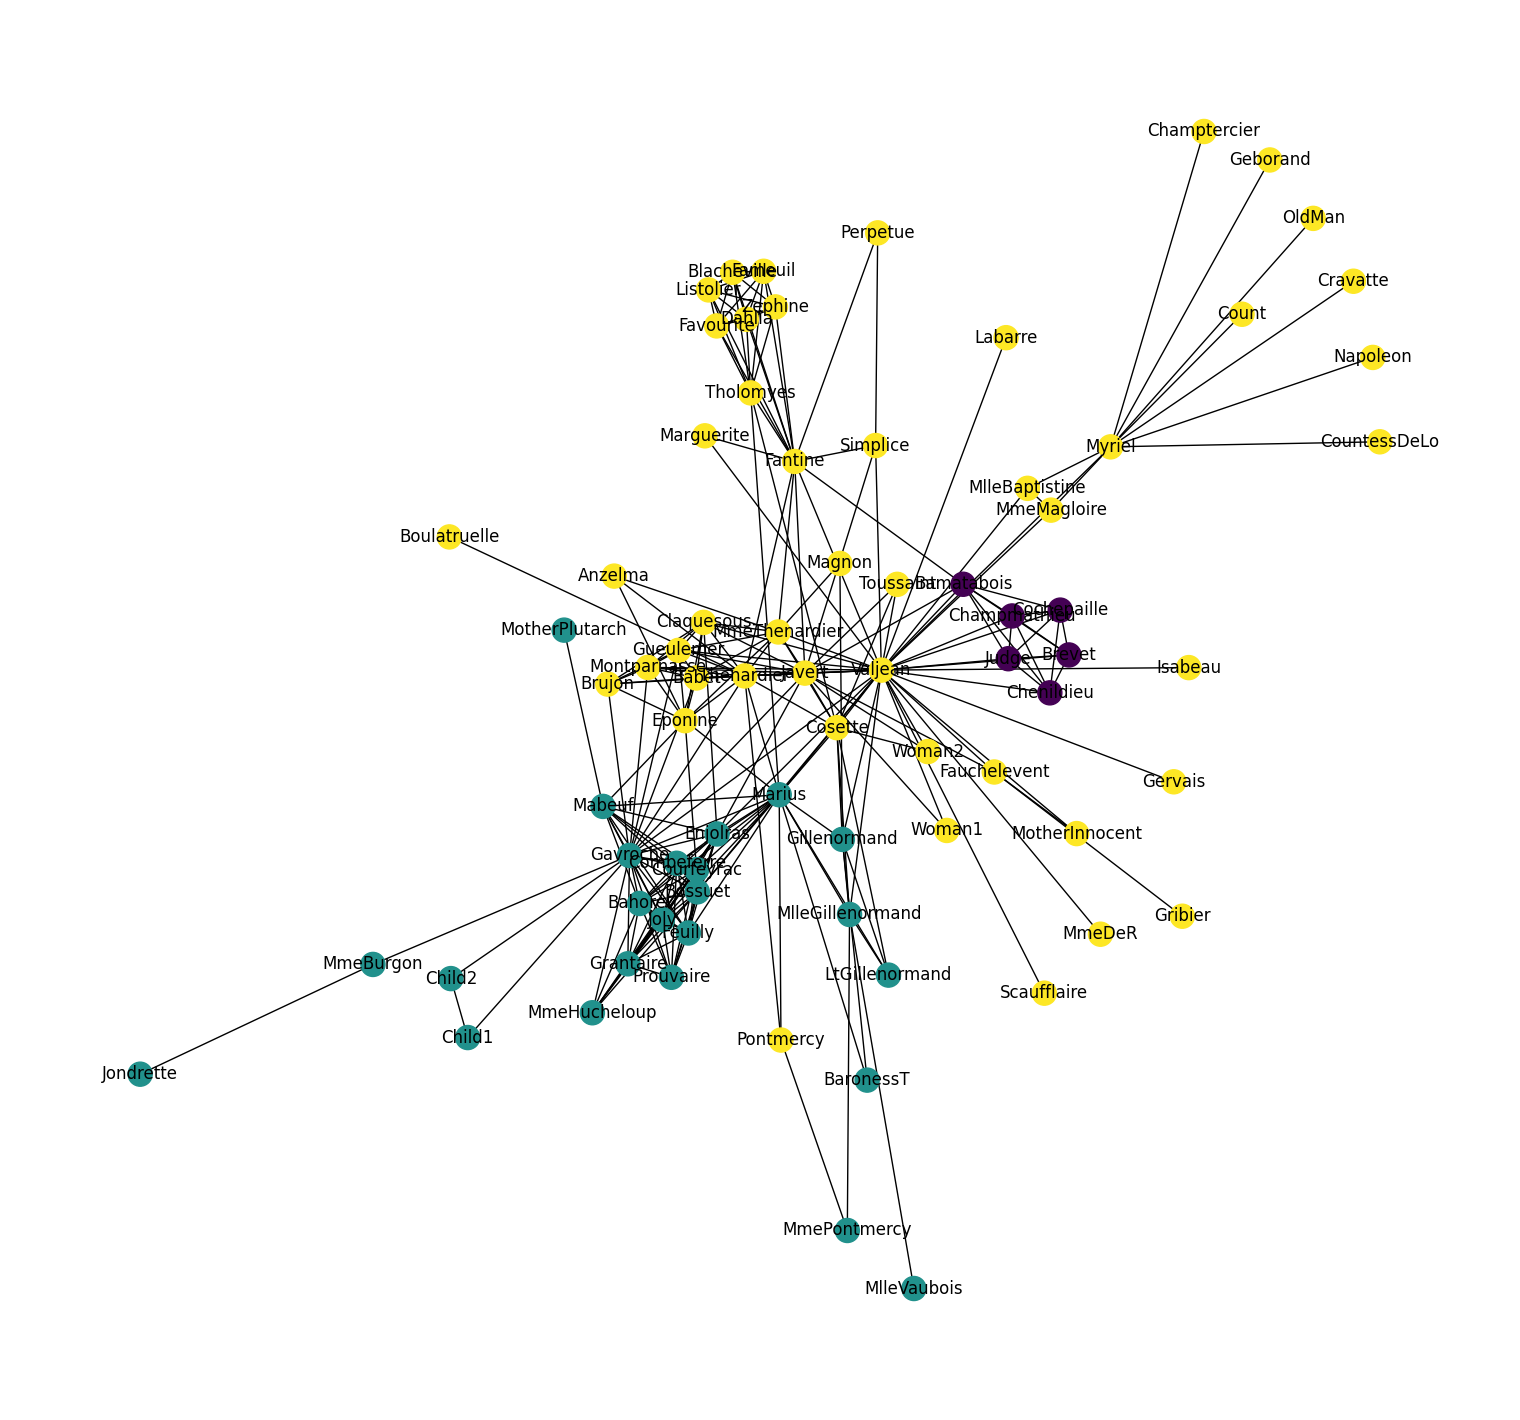

In [28]:
colors = []
nodes = list(G.nodes)
# 按照 networkx 的顺序把颜色标注出来
for node in nodes:
    idx = model.wv.key_to_index[str(node)]
    colors.append(cluster_labels[idx])
    
plt.figure(figsize=(15,14))
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()

### PCA 降维可视化

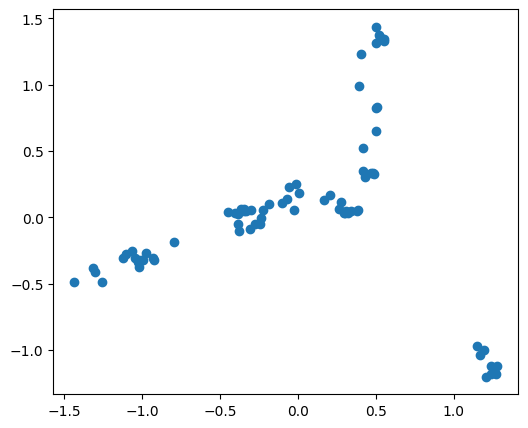

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)


# # TSNE 降维
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, n_iter=5000)
# embed_2d = tsne.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(embed_2d[:,0], embed_2d[:,1])
plt.show()

### 分析 Embedding

In [36]:
model.wv.get_vector('Napoleon').shape

(32,)

In [38]:
# 查看节点的 Embedding
model.wv.get_vector('Napoleon')

array([ 0.16437183, -0.05719004,  0.7591357 ,  0.5262734 , -0.28540358,
        0.3609386 , -0.0202415 ,  0.59487563,  0.16668592, -0.36358935,
       -0.31636822, -0.24678008,  0.07872051,  0.2453149 ,  0.47021243,
        0.14235401, -0.24516489, -0.06233275, -0.7360416 ,  0.5266324 ,
        0.25197074,  0.8208004 ,  0.1812625 ,  0.4639347 , -0.02985335,
        0.46994781, -0.01152692,  0.50284547,  0.06440508, -0.58088064,
        0.41836476,  0.20175534], dtype=float32)

In [41]:
# 查找相似节点
model.wv.most_similar('Napoleon')

[('Count', 0.9734092950820923),
 ('Geborand', 0.9711518883705139),
 ('Champtercier', 0.9699333310127258),
 ('CountessDeLo', 0.9690977931022644),
 ('OldMan', 0.9581858515739441),
 ('Cravatte', 0.9463319182395935),
 ('MmeMagloire', 0.9301953911781311),
 ('MlleBaptistine', 0.9220814108848572),
 ('Myriel', 0.8496583104133606),
 ('Labarre', 0.43950924277305603)]

In [42]:
model.wv.similar_by_word('Napoleon')

[('Count', 0.9734092950820923),
 ('Geborand', 0.9711518883705139),
 ('Champtercier', 0.9699333310127258),
 ('CountessDeLo', 0.9690977931022644),
 ('OldMan', 0.9581858515739441),
 ('Cravatte', 0.9463319182395935),
 ('MmeMagloire', 0.9301953911781311),
 ('MlleBaptistine', 0.9220814108848572),
 ('Myriel', 0.8496583104133606),
 ('Labarre', 0.43950924277305603)]

In [43]:
# 查看任意两个节点的相似度
model.wv.similarity('Napoleon', 'Napoleon')

1.0

In [44]:
model.wv.similarity('Napoleon', 'OldMan')

0.9581857

## 4. 对连接做 Embedding

In [45]:
from node2vec.edges import HadamardEmbedder

# Hadamard 二元操作：两个 Embedding 对应元素相乘
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

# 查看两个节点之间连接的 Embedding
edges_embs[('Napoleon', 'OldMan')]

array([ 0.02212512,  0.01081607,  0.49410883,  0.25259754,  0.09594341,
        0.08860359,  0.00081227,  0.37484962,  0.03543219,  0.09974428,
        0.06573805,  0.01136922,  0.00543256,  0.04992007,  0.1747883 ,
       -0.00262563,  0.01901744,  0.01046612,  0.63943666,  0.2961468 ,
        0.11473472,  0.5845541 ,  0.05060175,  0.23471911,  0.00586544,
        0.29180774, -0.00227471,  0.16711667, -0.00148958,  0.39783025,
        0.15422934,  0.0504636 ], dtype=float32)

In [46]:
# 计算所有 Edge 的 Embedding
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|███████████████████████████████████████████████| 3003/3003.0 [00:00<00:00, 248123.53it/s]


In [49]:
len(edges_kv.index_to_key)

3003

In [50]:
edges_kv.index_to_key

["('Valjean', 'Valjean')",
 "('Marius', 'Valjean')",
 "('Enjolras', 'Valjean')",
 "('Courfeyrac', 'Valjean')",
 "('Cosette', 'Valjean')",
 "('Thenardier', 'Valjean')",
 "('Combeferre', 'Valjean')",
 "('Bossuet', 'Valjean')",
 "('Gavroche', 'Valjean')",
 "('Fantine', 'Valjean')",
 "('Myriel', 'Valjean')",
 "('Javert', 'Valjean')",
 "('Joly', 'Valjean')",
 "('MmeThenardier', 'Valjean')",
 "('Bahorel', 'Valjean')",
 "('Feuilly', 'Valjean')",
 "('Gillenormand', 'Valjean')",
 "('Babet', 'Valjean')",
 "('Tholomyes', 'Valjean')",
 "('Favourite', 'Valjean')",
 "('MlleGillenormand', 'Valjean')",
 "('MmeMagloire', 'Valjean')",
 "('Gueulemer', 'Valjean')",
 "('Blacheville', 'Valjean')",
 "('Dahlia', 'Valjean')",
 "('Eponine', 'Valjean')",
 "('Fameuil', 'Valjean')",
 "('Valjean', 'Zephine')",
 "('Listolier', 'Valjean')",
 "('MlleBaptistine', 'Valjean')",
 "('Claquesous', 'Valjean')",
 "('Fauchelevent', 'Valjean')",
 "('Prouvaire', 'Valjean')",
 "('Mabeuf', 'Valjean')",
 "('Champmathieu', 'Valjean'

In [47]:
# 查看关系与 节点对 最相似的节点对
edges_kv.most_similar(str(('Napoleon', 'OldMan')))

[("('Count', 'OldMan')", 0.9915876388549805),
 ("('CountessDeLo', 'OldMan')", 0.9897369742393494),
 ("('CountessDeLo', 'Napoleon')", 0.9895244240760803),
 ("('Geborand', 'Napoleon')", 0.9881743788719177),
 ("('Champtercier', 'OldMan')", 0.9877184629440308),
 ("('Geborand', 'OldMan')", 0.9872523546218872),
 ("('Count', 'Napoleon')", 0.9845482707023621),
 ("('OldMan', 'OldMan')", 0.9842210412025452),
 ("('Napoleon', 'Napoleon')", 0.9839144349098206),
 ("('Cravatte', 'OldMan')", 0.9834887385368347)]